In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(color_codes=True)

In [2]:
# Load the dataset of cars from sns 
df = sns.load_dataset('mpg')

In [3]:
# save the dataset to a csv file
df.to_csv('mpg.csv')

In [4]:
df = pd.read_csv('mpg.csv')
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.tail()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
df.dtypes

Unnamed: 0        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [7]:
df.shape

(398, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [9]:
df = df.rename(columns={'Unnamed: 0' : 'index'})
df.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [11]:
df_duplicated = df[df.duplicated()]
print('duplicated rows in the dataset are: ', df_duplicated.shape)

duplicated rows in the dataset are:  (0, 10)


In [12]:
df.count()

index           398
mpg             398
cylinders       398
displacement    398
horsepower      392
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [13]:
# df = df.drop_duplicates() # drop the duplicated rows
df.isnull().sum()

index           0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [14]:
# df = df.dropna() # drop the rows with missing values

In [15]:
df['horsepower'].mean()

104.46938775510205

In [16]:
# fill the missing values with the mode of the column
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
df.isnull().sum()

index           0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

<Axes: xlabel='horsepower'>

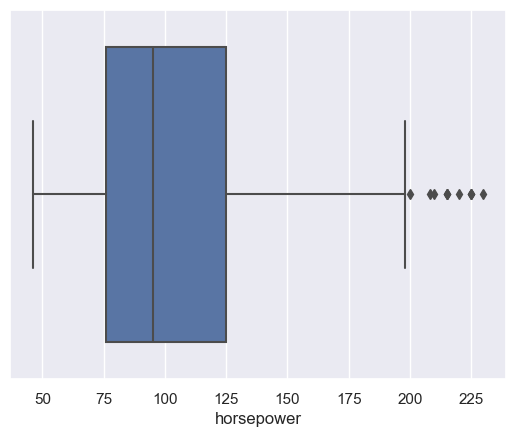

In [17]:
sns.boxplot(x=df['horsepower'])

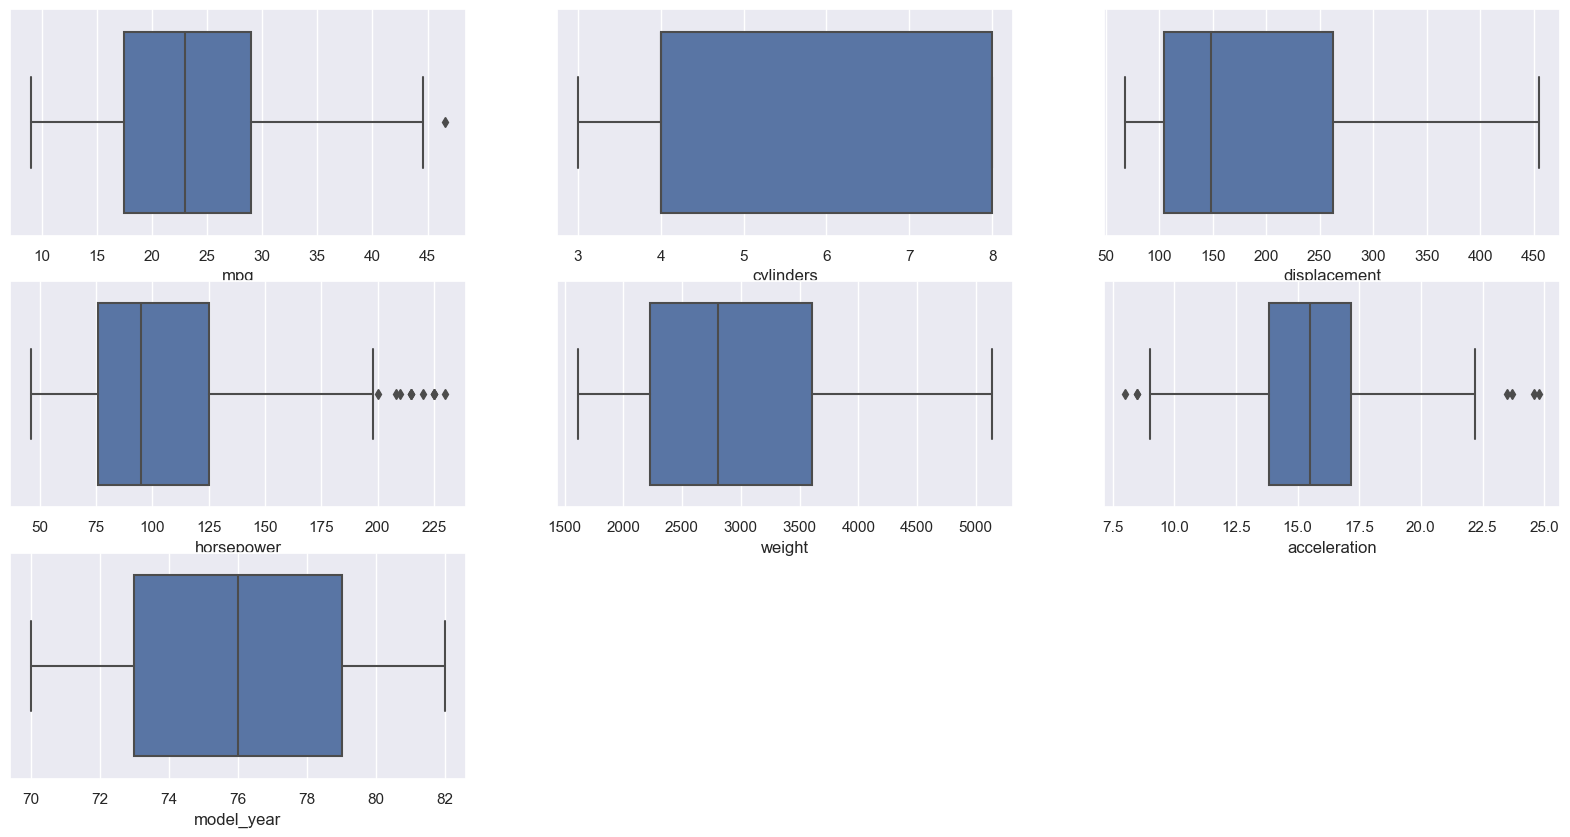

In [18]:
# boxplot for all the columns as a subplots
plt.figure(figsize=(20, 10))
plt.subplot(3, 3, 1)
sns.boxplot(x=df['mpg'])
plt.subplot(3, 3, 2)
sns.boxplot(x=df['cylinders'])
plt.subplot(3, 3, 3)
sns.boxplot(x=df['displacement'])
plt.subplot(3, 3, 4)
sns.boxplot(x=df['horsepower'])
plt.subplot(3, 3, 5)
sns.boxplot(x=df['weight'])
plt.subplot(3, 3, 6)
sns.boxplot(x=df['acceleration'])
plt.subplot(3, 3, 7)
sns.boxplot(x=df['model_year'])

plt.show()

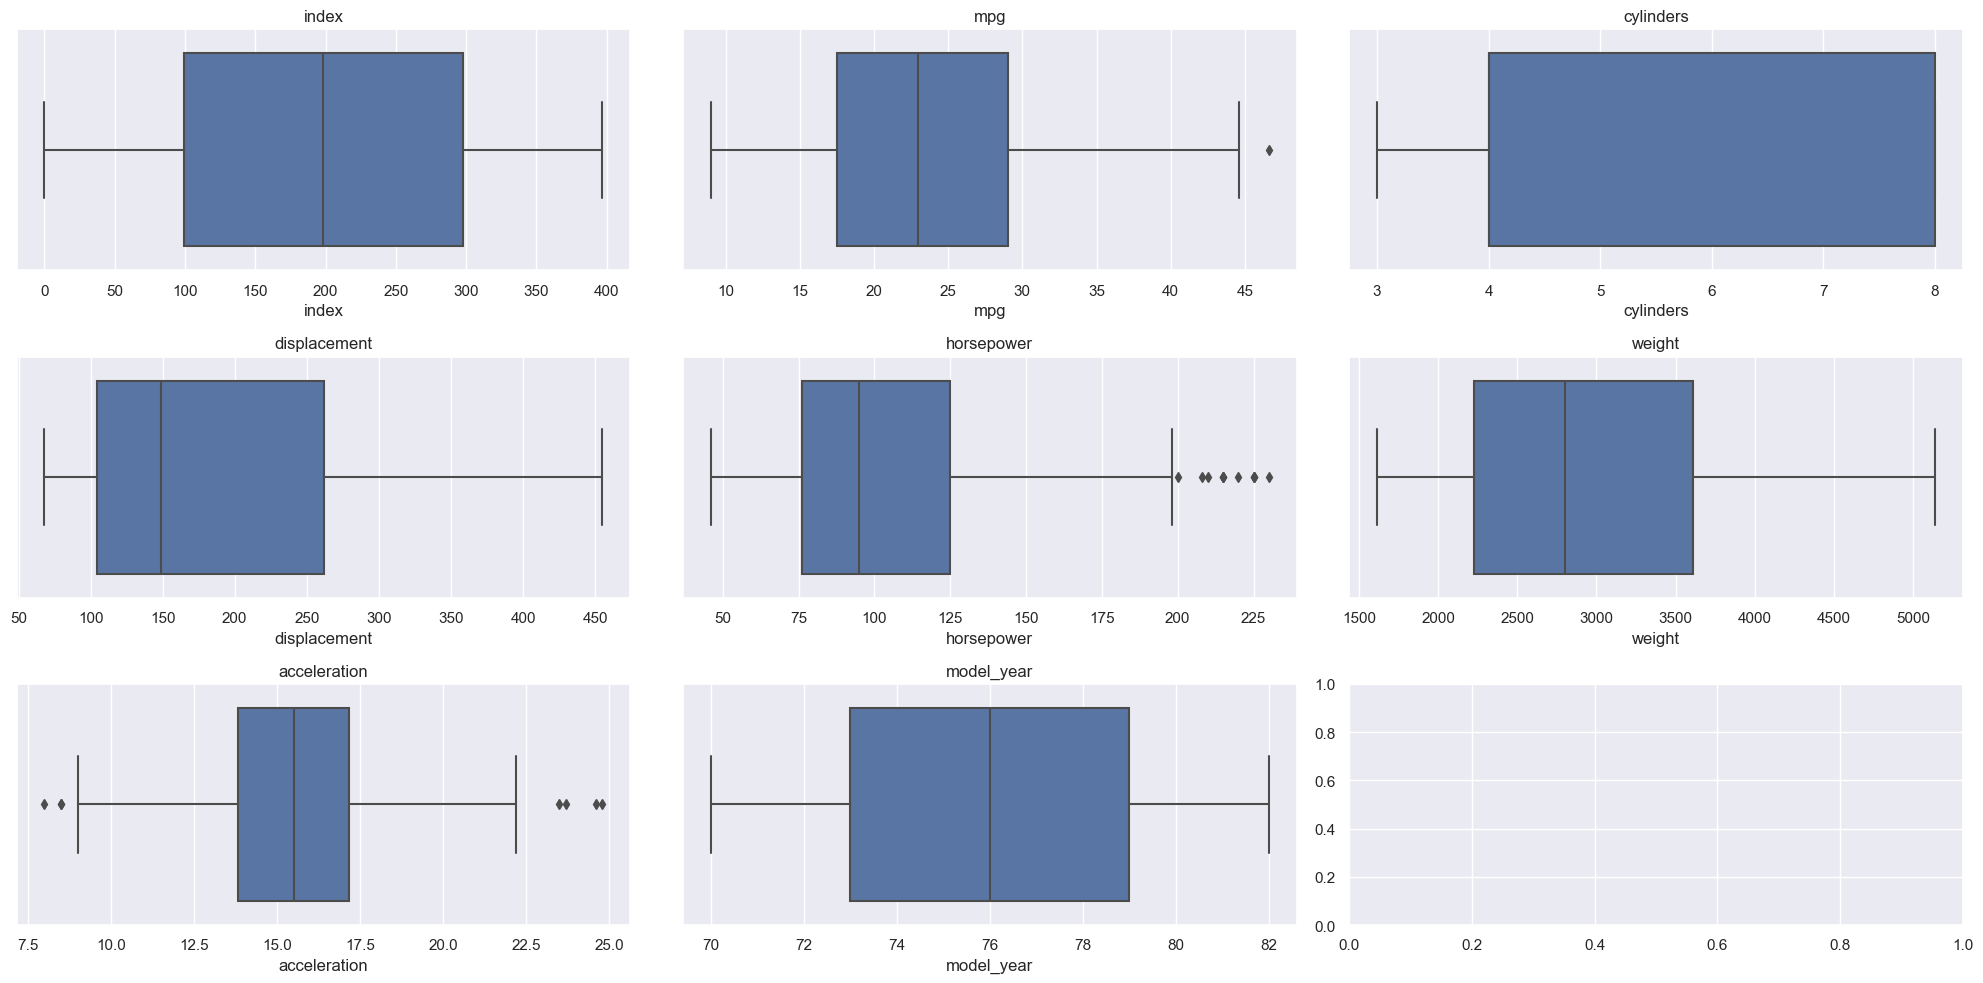

In [19]:
num_cols = df.select_dtypes(include=np.number).columns # select the numerical columns

fig, axes = plt.subplots(3, 3, figsize=(20, 10)) # create 3x3 subplots

for i, column in enumerate(num_cols): # loop through all the numerical columns
    row = i // 3 # get the row position
    col = i % 3 # get the column position
    sns.boxplot(x=df[column], ax=axes[row, col]) # create boxplot on each iteration
    axes[row, col].set_title(column) # set the title of each subplot

plt.tight_layout() # adjust the subplots to fit into the figure
plt.show() # display the figure

In [20]:
IQR_scores = df[num_cols].apply(lambda x: x.quantile(0.75) - x.quantile(0.25)) # calculate the IQR scores
IQR_scores

index            198.50
mpg               11.50
cylinders          4.00
displacement     157.75
horsepower        49.00
weight          1384.25
acceleration       3.35
model_year         6.00
dtype: float64

In [21]:
# IQR_scores = {}  # dictionary to store the IQR scores

# for column in num_cols:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     IQR_scores[column] = IQR

# print(IQR_scores)


In [22]:
# # showing the dictionary into vertical stack
# IQR_df = pd.DataFrame(IQR_scores, index=['IQR'])
# IQR_df = IQR_df.T
# IQR_df

In [23]:
# ignore warnings
import warnings
# set the warning filter to ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

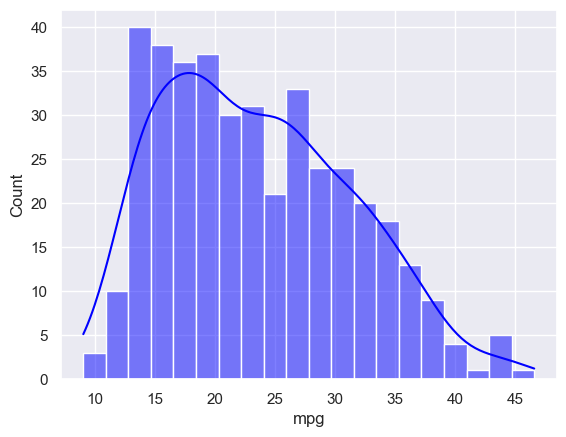

In [24]:
# Distribution plot for all the columns as subplots
sns.histplot(df['mpg'], kde=True, bins=20, color='blue')
plt.show()

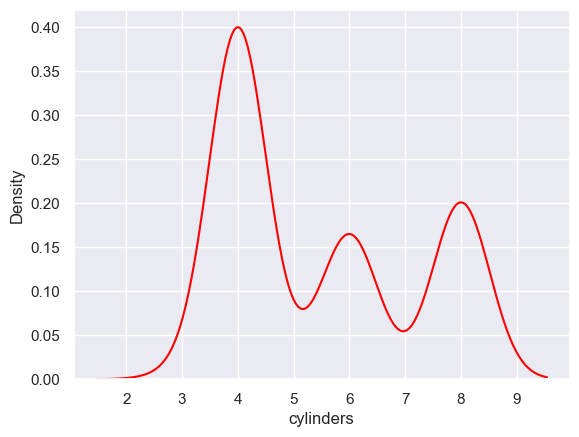

In [25]:
sns.distplot(df['cylinders'], kde=True, hist=False, color='red')
plt.show()

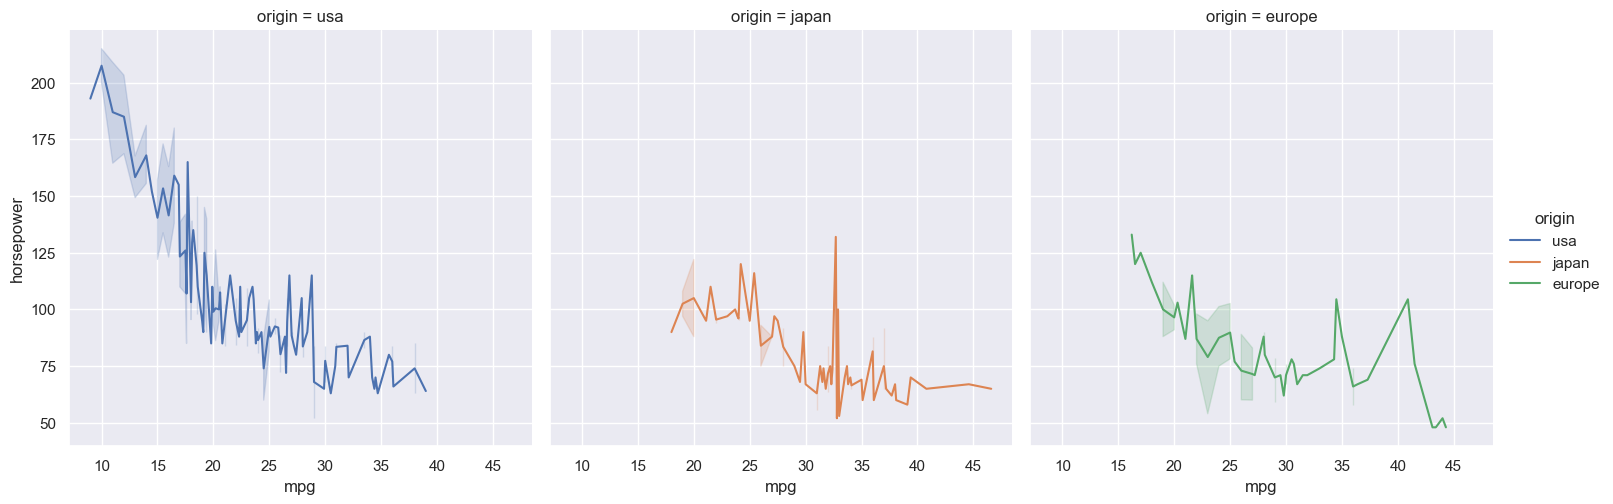

In [26]:
sns.relplot(x='mpg', y='horsepower', data=df, kind='line', hue='origin', col='origin')
plt.show()

In [27]:
df.columns

Index(['index', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

<Axes: xlabel='horsepower', ylabel='weight'>

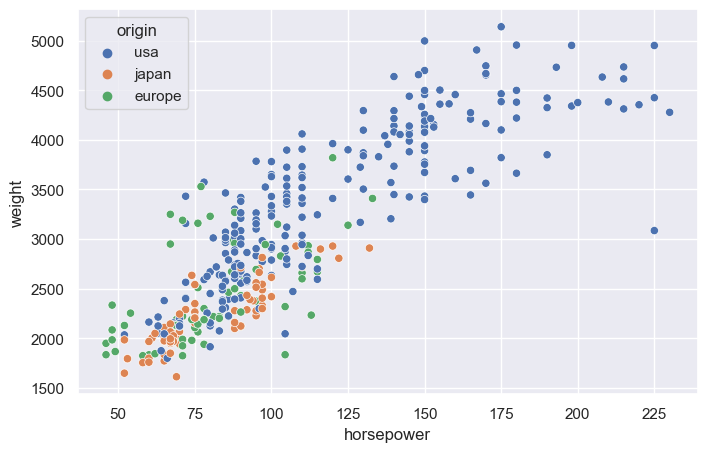

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='horsepower', y='weight', data=df, hue='origin')

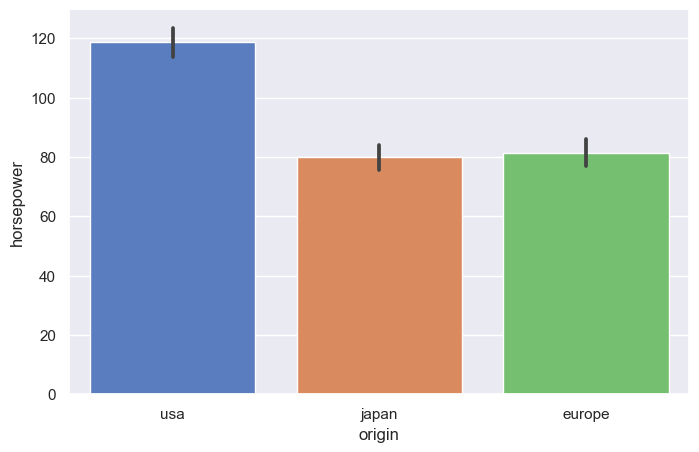

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x='origin', y='horsepower', data=df, palette='muted',orient='v')
plt.show()

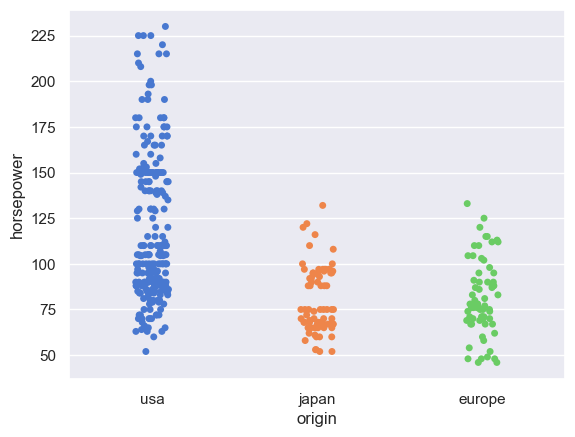

In [30]:
sns.stripplot(x='origin', y='horsepower', data=df, jitter=True, palette='muted', dodge=True)
plt.show()

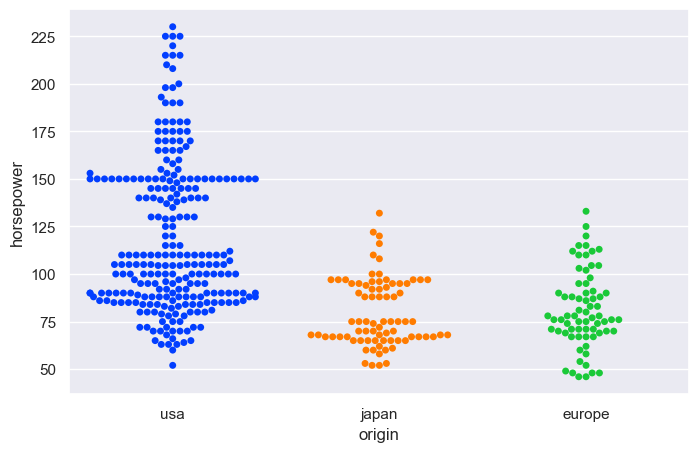

In [31]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='origin', y='horsepower', data=df, palette='bright')
plt.show()

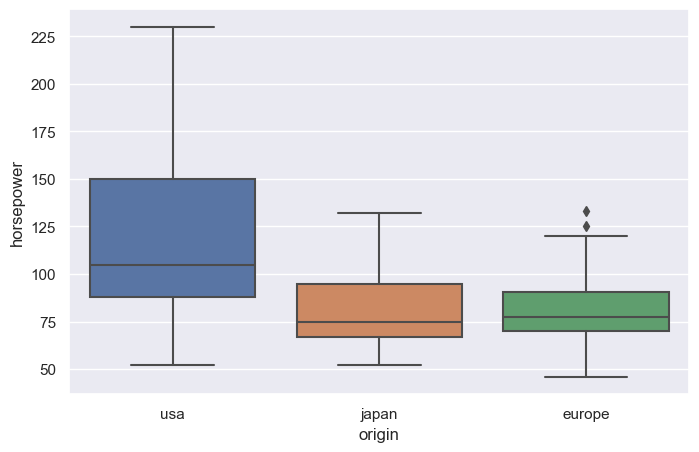

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='origin', y='horsepower', data=df, palette='deep')
plt.show()

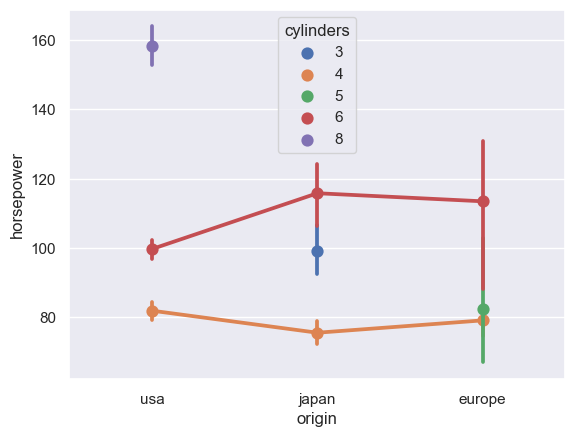

In [33]:
sns.pointplot(x='origin', y='horsepower', data=df, hue='cylinders')
plt.show()

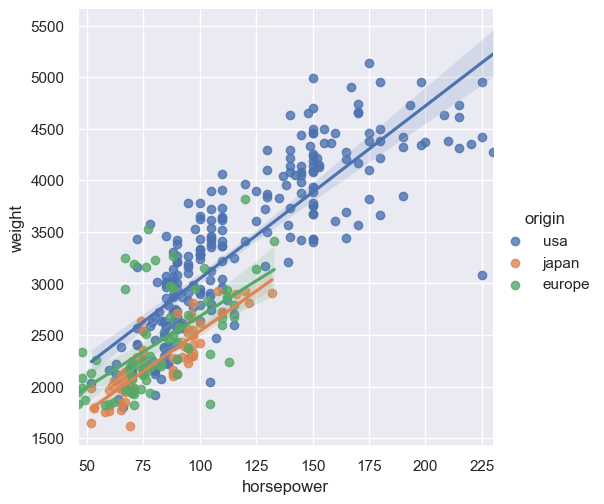

In [34]:
sns.lmplot(x='horsepower', y='weight', data=df, hue='origin')
plt.show()

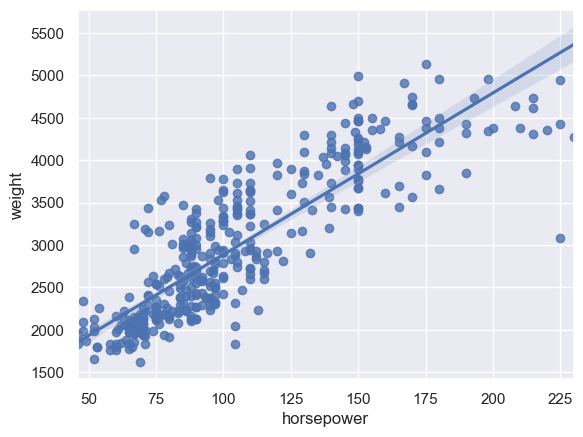

In [35]:
sns.regplot(x='horsepower', y='weight', data=df)
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         398 non-null    int64  
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [37]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop('index')
num_cols

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

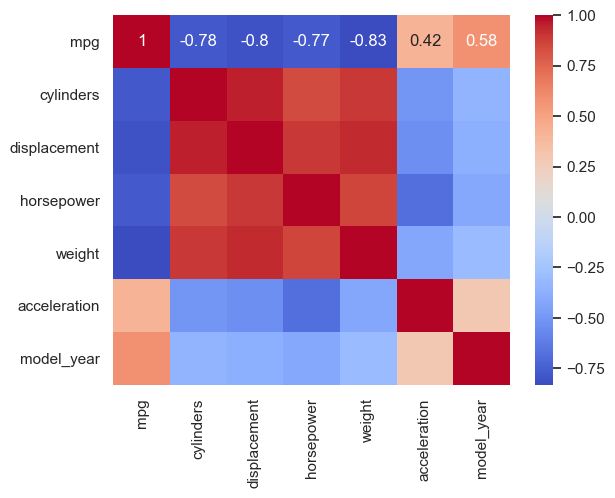

In [38]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()